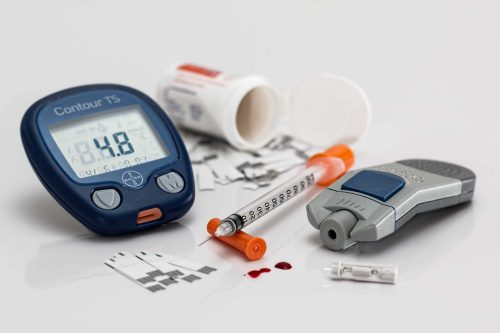

In [29]:
from IPython.display import Image #Library to import the image as a poster for the project
Image(filename="/Users/harshthakur/Documents/VSC/Deep Learning Project/diabetes-528678-500x333.png", width=820, height=30)


# DIABETES DETECTION USING DEEP NEURAL NETWORK
<br></br>

Diabetes is a metabolic disorder which is governed by how much sugar is consumed and how the body processes it. People who have diabetes have symptoms of body not being able to produce enough insulin. There are a lot of factors which influence this hormonal disorder. 
Some of them are diastolic blood pressure, oral glucose tolerance, pregnancy instances, body mass index, age, skin fold thickness, serum insulin, etc. 

In my project, I have taken a dataset which has the data for the given variables which influence the presence of Diabetes in a human. 
The data that I will work with have eight variables which govern the existence of Diabetes. These 8 variables have a number associated with them the ninth variable has 0 and 1, where 0 means non diabetic, and 1 means diabetic. 

The data consists of 8 different measurements or features.These features are used to predict a person's likelihood of having diabetes.


#### **The 8 features in the dataset are:**

1.Number of times a patient has gotten pregnant.

2.Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

3.Diastolic blood pressure (mm Hg).

4.Triceps skin fold thickness (mm).

5.2-Hour serum insulin levels (mu U/ml).

6.Body mass index (weight in kg/(height in m)^2).

7.Diabetes pedigree function.

8.Age (years).

9.The last variable in the data set is the class variable.The class variable is a binary variable, with 1 indicating that the person has diabetes and 0 indicating that they do not.


By analyzing the relationship between the features and the class variable, we can build a model that can predict whether a person has diabetes or not.

Class variables 0 and 1 have 500 and 268 instances of occurance. This means that a patient is more likely to be non diabetic than having Diabetes. 
<BR></BR>
<BR></BR>

### **IMPORTING KERAS MODEL, LAYERS AND SCIKIT-LEARN LIBRARIES**

**KERAS** is an open source library which acts as a Python interface to use the Tensorflow library used for making Deep Learning models.  

Keras has some models which can be used to create neural network layers. We will be using **'Sequential'** class in the Keras library to create layers on top of each other. One layer takes input and other sequential layers take inout from the previous layers and eventually, the output layer spits out the result. 
<br></br>
Next, we have used Keras model- Dense. The Dense model in keras is used to create a fully linked Neural Network in which each layer is connected to all other layers in the neural network. 
<br></br>
Next, we have used sklearn.model_selection in which we have imported the library train_test_split to split the data into training and test data. 

Lastly, I have used StandardScale library in sklearn.preprocessing which is used to scale the neural network and adjust the numerical input data. 

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<BR></BR>
### **LOADING DATA AND SPLITTING IT INTO INPUT VARIABLE 'X' AND OUTPUT VARIABLE 'Y'**

We will first read our data from a CSV file. The CSV file that we are taking does not have a header row.
After reading the data, we will store Column 1 to 8 as variable X as input data
Column 9 values are output data. We will use X and Y for different training and testing sets.

In [51]:
# Load the dataset from a local CSV file 
data_source = "pima-indians-diabetes.data.csv"
df = pd.read_csv('/Users/harshthakur/Documents/VSC/Deep Learning Project/pima-indians-diabetes.data.csv', header=None)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values # X contains all rows and all columns except the last column
y = df.iloc[:, -1].values # y contains all rows and only the last column


<BR></BR>
### **SCALING AND SPLITTING THE DATA**

Scaling the data is a process of making the data even for training. In scaling, the data's mean is adjusted to zero and the standard deviation is adjusted to one. 
For doing this, we will use sckit-learn module called Scaler and scaler.fit_transorm(X) will set the scaler module fit to the variable X and to scale its values.

train_test_split is another function from the scikit-learn library which is used to split the data. Here we are splitting the data into Training and Testing for X and Y both. 
I have specified the test size of 20% which is 0.2 and I have set the batch seed of 42.

In [52]:

# Normalize the input data
scaler_model = StandardScaler()
X = scaler_model.fit_transform(X) # Normalize the data in X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets


### **DEFINE THE MODEL, ADD LAYERS AND COMPILING THE MODEL**

<br></br>
I am using a Sequential Model here that I have defined above.
model.add adds a neural layer. In the first layer I have added 64 neurons, and added an activation function of rectified linear unit. 
<br></br>
Since we are dealing with Diabetes detection based on 0 and 1, it is a case of binary classification. 
Therefore, I have used the loss function as 'binary crossentropy', the optimizer is chosen as 'RMSprop' as learning rate optimization algorithm which adapts itself, and the evaluation metric for the model is set to 'accuracy'.

In [40]:
# Define the model
model = Sequential() # Create an instance of the Sequential model
model.add(Dense(units=64, activation='relu', input_dim= X_train.shape[1])) # Add a fully connected layer with 64 neurons, relu activation function and input dimension of X_train
model.add(Dense(units=32, activation='relu')) # Add another fully connected layer with 32 neurons and relu activation function
model.add(Dense(units=16, activation='relu')) # Add another fully connected layer with 16 neurons and relu activation function
model.add(Dense(units=1, activation='sigmoid')) # Add a final fully connected layer with 1 neuron and sigmoid activation function

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy']) # Compile the model with binary_crossentropy as the loss function, RMSprop as the optimizer and accuracy as the metric


### **TRAINING AND EVALUATING THE MODEL**

**model.fit()** takes the training data and trains the model on that. Here, the model is trained on the training data (X_train and y_train) for 100 epochs, with a batch size of 32, and uses the validation data (X_test and y_test) to evaluate the performance of the model during training.

**model.compile()** is a function which defines the model and this model is used in each epoch which is defined in the model.fit() function. When each epoch is run, it adjusts the weight of the neurons which are defined in each layer of model and the weight is governed by the difference of error between the expected and acutal value. 

Within the model.fit(), I have defined **batch size as 32**. Batch size defines the number of samples of neurons that are required to propogate within the neural network on each iteration. 

In the end, I have defined the **validation data** as X_test and Y_test which means that X_test and Y_test will be used for validating the accuracy of the model which got trained on X_train and Y_train which was 80% of the data sample. 

In [43]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) # Train the model with X_train and y_train data, for 100 epochs, with a batch size of 32, and validate using X_test and y_test data

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test) # Evaluate the model on the testing data
print('Test loss:', score[0]) # Print the test loss
print('Test accuracy:', score[1]*100, '%') # Print the test accuracy as a percentage

Epoch 1/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1962 - accuracy: 0.9332 - val_loss: 0.8289 - val_accuracy: 0.7013
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.1952 - accuracy: 0.9300 - val_loss: 0.8622 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1912 - accuracy: 0.9349 - val_loss: 0.8283 - val_accuracy: 0.7078
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1897 - accuracy: 0.9332 - val_loss: 0.8443 - val_accuracy: 0.6883
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1869 - accuracy: 0.9316 - val_loss: 0.8651 - val_accuracy: 0.6883
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1833 - accuracy: 0.9300 - val_loss: 0.9305 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1822 - accuracy: 0.9365 - val_loss: 0.8593 - val_accuracy: 0.6883
Epoch 8/100

### **PREDICTION AND PRINTING THE PREDICTION RESULTS**
<br></br>
The **model.predict()** function is used to make predictions by applying the model that we trained above to the test dataset. Here I have used X_test as the test dataset. 
The predictions are then stored in the variable **y_prediction**.
<br></br>
For working on storing and displaying the first 10 samples of the prediction set (y_prediction), I have first created an empty list called results. 
Then I have created a for loop which loops through the first ten samples of the y_prediction list. The list is created from the first ten samples of predictions by using binary classification of determining if the patient is diabetic or non diabetic.

The **'predicted'** variable stores the ith element from the y_prediction list. 
<br></br>
Another variable **'expected'** is created and stores the binary numbers 0 and 1. This expected variable stores 0 or 1 based on the value of the variable predicted. If the predicted variable is less than 0.50 then the expected variable is set to 0, and if the predicted variable is 0.50 or greater, the expected variable is set to 1. 
<br></br>
The **'actual'** variable stores the results based on the expected variable. If the expected variable was 0, then the actual variable is set to **Not Diabetic** and if the expected variable was 1, then the actual variable is set to **Diabetic**. 

<br></br>
All the variables such as **'predicted' , 'actual', 'expected', and 'ith number'** are stored in results list. In the end, I have attached header values to the results list and printed the first 10 samples with expected value, actual value, and result of the test. 

In [42]:
# Predict on the test set
y_prediction = model.predict(X_test) # Predict on the testing data

# Format the predicted and expected values for the first 10 samples
results = []
for i in range(10):
    predicted = y_prediction[i][0]
    expected = 1 if predicted >= 0.5 else 0
    actual = "Diabetic" if expected == 1 else "Not Diabetic"
    results.append((i+1, actual, predicted, expected)) # Append the predicted and expected values for the first 10 samples to the results list

# Print the results 
print("Sample\Result\t\tPredicted\tExpected") # Print the headers for the results table
for r in results:
    print("{:5}\t{:12}\t{:.3f}\t{:6}".format(r[0], r[1], r[2], r[3])) # Print the results table with proper spacing and formatting


5/5 [==============================] - 0s 2ms/step
Sample\Result		Predicted	Expected
    1	Not Diabetic	0.257	     0
    2	Not Diabetic	0.024	     0
    3	Not Diabetic	0.004	     0
    4	Not Diabetic	0.100	     0
    5	Diabetic    	0.591	     1
    6	Not Diabetic	0.232	     0
    7	Not Diabetic	0.000	     0
    8	Not Diabetic	0.141	     0
    9	Diabetic    	0.839	     1
   10	Diabetic    	0.686	     1


### **FINAL RESULT** 


In this project, I have used a **simple Deep Neural Network to implement a simple case of Binary Classifiation to determine if a given patient is Diabetic or not**.

In this project, I have used Keras.model of the Sequential, as well as a neural network which consists of 4 layers.
In each layer, I have used **64,32,16 and 1 neurons** respectively. 

The training data was divided into sets of two variables- X and Y in which 80% of the data was used for training and 20% of the data was used for testing. 

Upon running the model with **100 epochs**, The model has an accuracy of about **71.4%**. We can also see that the test loss has been declining with the ascending number of epochs.

The results for the test are shown below. Test accuracy is displayed as 71.4% as well as the table with the output of results- whether the patient is diabetic or not is also displayed.


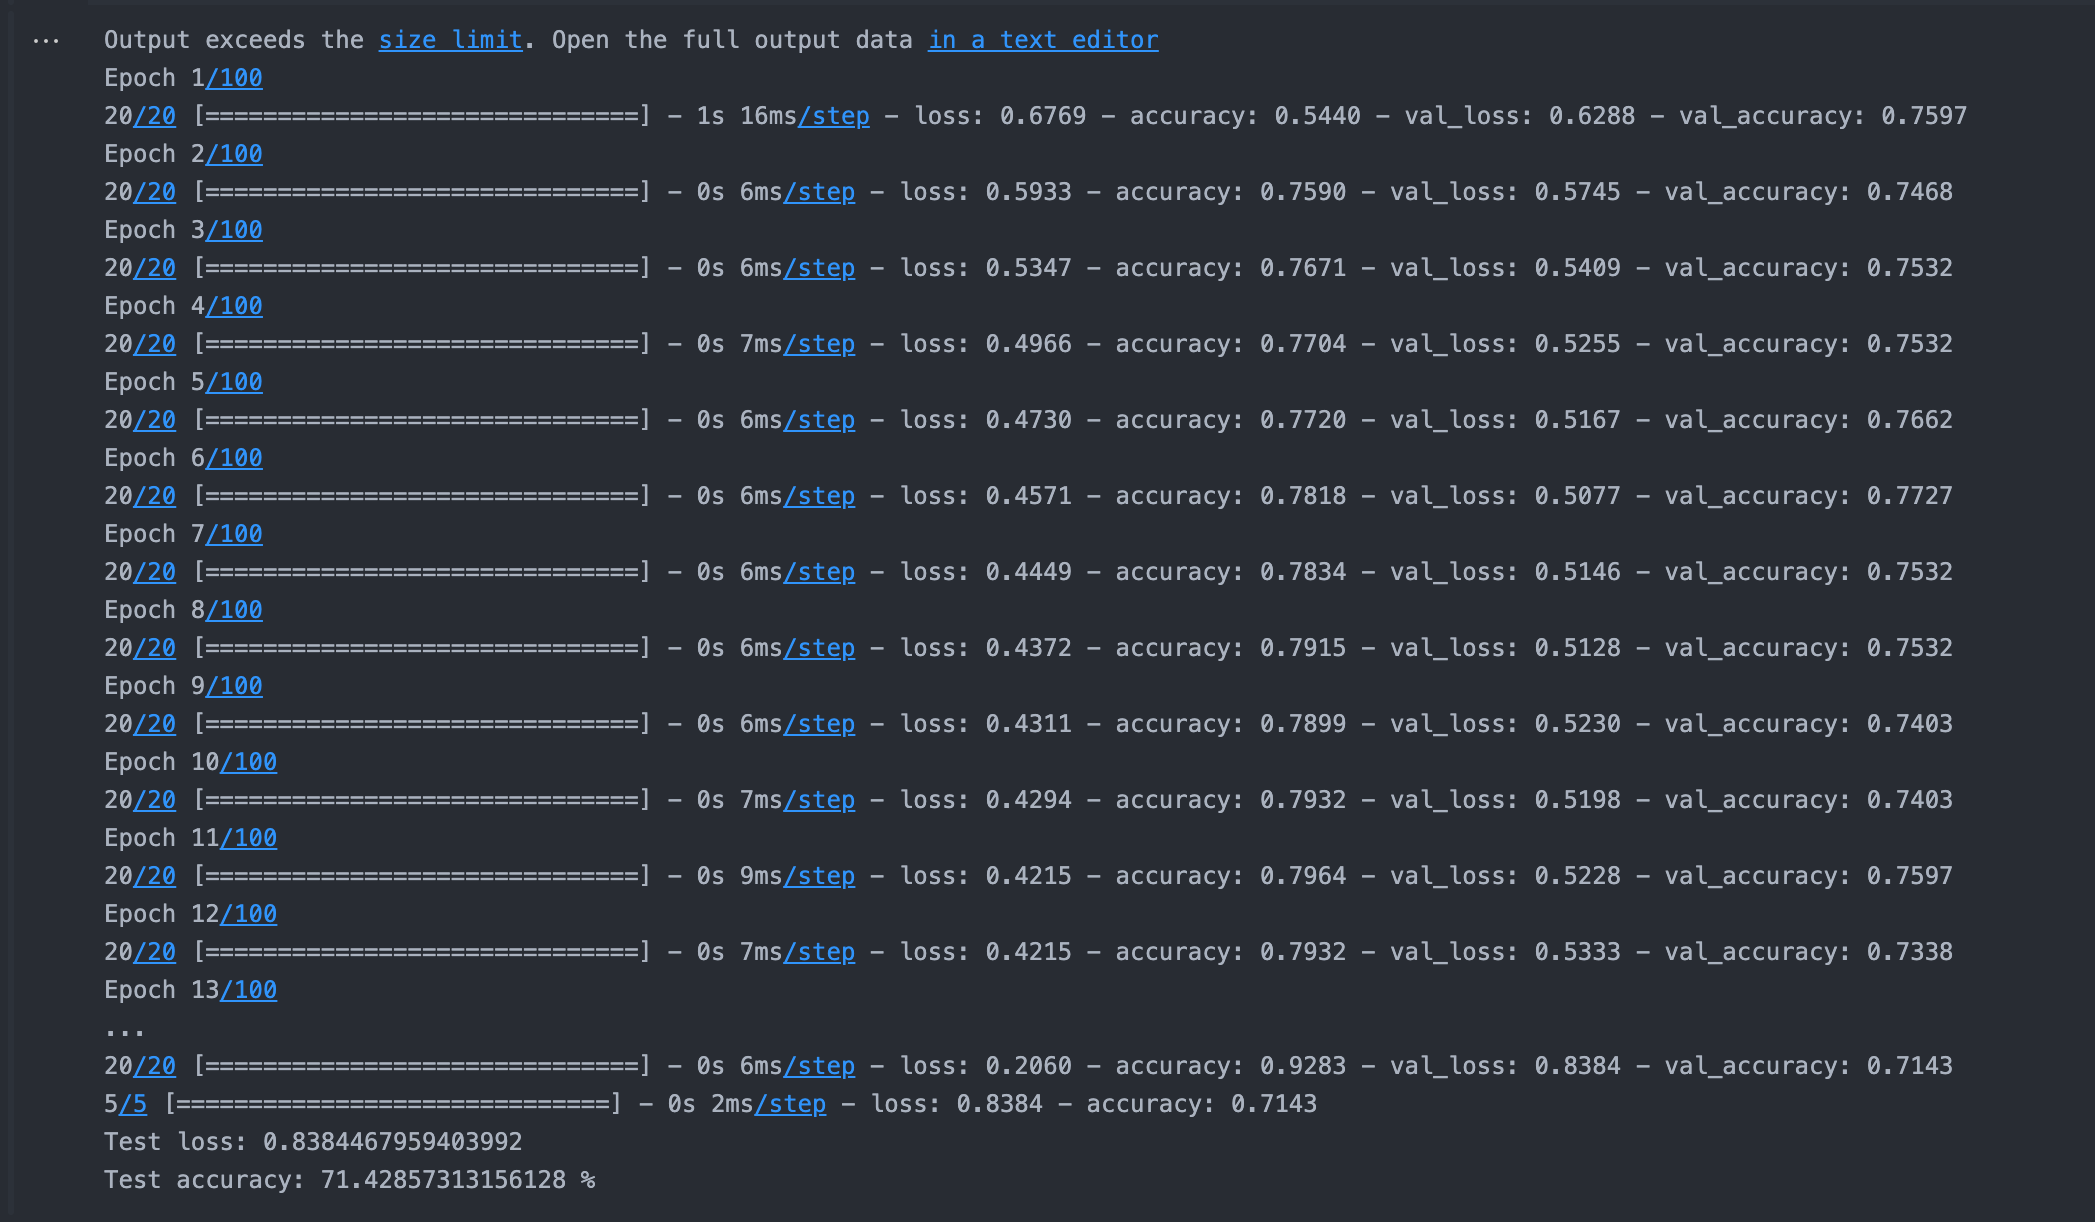

In [46]:
from IPython.display import Image #Library to import the image as a poster for the project
Image(filename="/Users/harshthakur/Documents/VSC/Deep Learning Project/epochs.png", width=800, height=15)


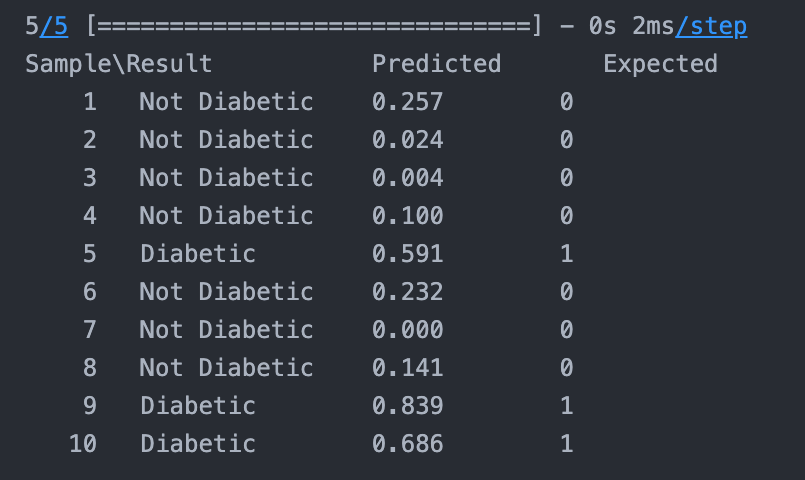

In [48]:
from IPython.display import Image #Library to import the image as a poster for the project
Image(filename="/Users/harshthakur/Documents/VSC/Deep Learning Project/results.png", width=600, height=10)


## References

The source where the data is taken from: https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.csv